<a href="https://colab.research.google.com/github/lkidane/Deep-learning-/blob/NLP/Copy_of_intro_to_rl_part_2_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Reinforcement Learning for grid-worlds



# Solving the labyrinth with reinforcement learning

This is the same class as before.

In [0]:
import torch
from copy import deepcopy

class GridWorldEnv():
    def __init__(self, start = (0, 0), rewards=[([3, 10], 1)]):
        self.grid = torch.LongTensor([
            [0 , 0 , 0 , 0 , 0 , -1, 0 , 0 , 0 , 0 , 0],
            [0 , 0 , 0 , 0 , 0 , -1, 0 , 0 , 0 , 0 , 0],
            [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
            [0 , 0 , 0 , 0 , 0 , -1, 0 , 0 , 0 , 0 , 0],
        ])
        self.direction = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        self.start = start
        for p, r in rewards:
            self.grid[p[0], p[1]] = r
        self.cur_pos = None
        self.done = False

    def reset(self):
        self.cur_pos = deepcopy(self.start)
        self.done = False
        return self.cur_pos, 0, self.done

    def act(self, action):
        """ action indexes self.direction"""
        reward = 0
        new_pos = [z + dz for z, dz in zip(self.cur_pos, self.direction[action])]
        if 0 <= new_pos[0] < self.grid.shape[0] and 0 <= new_pos[1] < self.grid.shape[1]:
            value = self.grid[new_pos[0]][new_pos[1]]
            if value >= 0:
                self.cur_pos = new_pos
                reward = value
                self.done = reward > 0
            self.done = self.done
        return self.cur_pos, reward, self.done
        

In the next cell, we use a simple version of Q-learning.

**Todo:**
- Fill in the todos.
- What is the effect of $\epsilon$ ?



In [2]:
import numpy as np

env = GridWorldEnv()
h, w = env.grid.shape
Q = torch.randn(h, w, len(env.direction))

gamma = 0.9  # Discount rate
eps = 1      # Epsilon
avg_t = []
for episode in range(1000):
    if (episode+1)% 100 == 0:
        print(np.mean(avg_t))
        avg_t = []
    state, reward, done = env.reset()
    t = 0
    while not done and t < 100:
        t+=1
        rand_number = torch.rand((1,)).item()
        if rand_number < eps:
            # TODO 1) With probability epsilon : take random action
            action = torch.randint(0, 4, (1,)).item()
        else:
            # TODO 2) With probability 1-epsilon : take best action according to Q
            action = torch.argmax(Q[state[0], state[1]]).item()

        new_state, reward, done = env.act(action)

        if not done:
            # TODO 3) Update Q : Q[s, a] <- reward + gamma * max(Q(new state, :))
            Q[state[0], state[1], action] = reward + gamma * torch.max(Q[new_state[0], new_state[1]])
        if done:
            Q[state[0], state[1], action] = reward

        state = new_state

    avg_t.append(t)
    eps *= 0.9  # Decay of epsilon



30.595959595959595
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0


Did we learn the correct policy ?
Did we learn the correct $Q$ function ?

**Todo:** 
- Plot the policy
- Plot the Q function

**We didn't learn the Q function perfectly, but it's well learned in the areas that are useful. Same for the policy !**


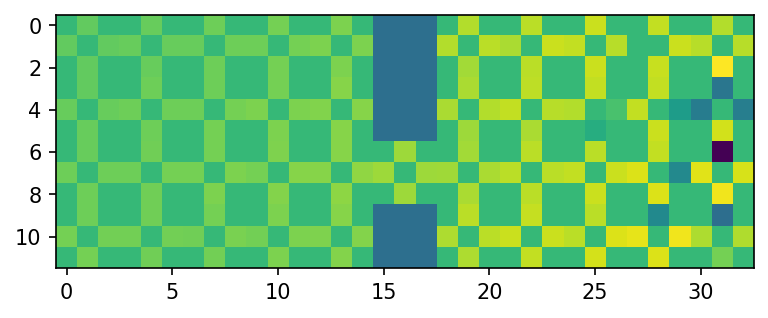

In [3]:
from matplotlib import pyplot as plt

to_display = torch.zeros(env.grid.shape[0] * 3, env.grid.shape[1] * 3)
for y in range(env.grid.shape[0]):
    for x in range(env.grid.shape[1]):
        if env.grid[y, x] == -1:
            for dy in range(3):
                for dx in range(3):
                    ny, nx = y * 3 + dy, x * 3 + dx
                    if 0 <= ny < 3 * h and 0<= nx < 3 * w:
                       to_display[ny, nx] = -1
        else:
            for dy in range(3):
                for dx in range(3):
                    ny, nx = y * 3 + dy, x * 3 + dx
                    if 0 <= ny < 3 * h and 0<= nx < 3 * w:
                       to_display[ny, nx] = 0
            
            to_display[y * 3, x * 3 + 1] = Q[y, x, 3]
            to_display[y * 3 + 1, x * 3] = Q[y, x, 1]
            to_display[y * 3 + 1, x * 3 + 2] = Q[y, x, 0]
            to_display[y * 3 + 2, x * 3 + 1] = Q[y, x, 2]

plt.figure(dpi=150)
plt.imshow(to_display)
plt.show()

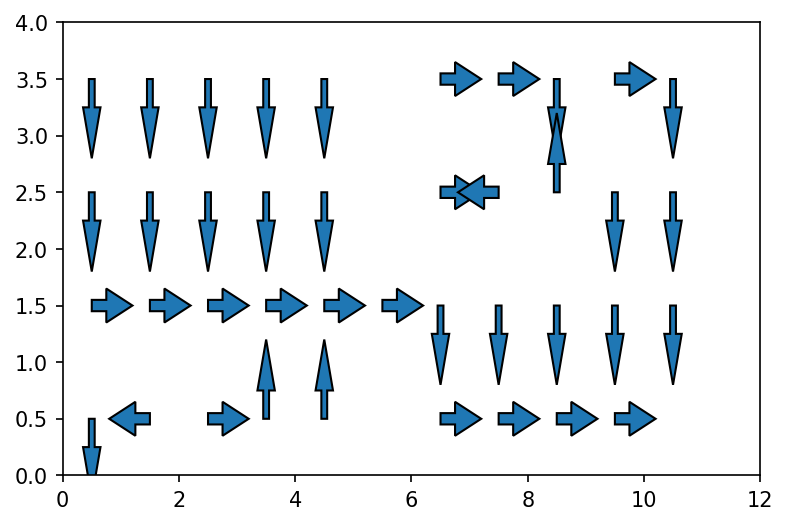

In [4]:
plt.figure(dpi=150)
for y in range(env.grid.shape[0]):
    for x in range(env.grid.shape[1]):
        if env.grid[y,x] ==0:
            best_action = torch.argmax(Q[y, x]).item()  # TODO
            dy, dx = env.direction[best_action]
            plt.arrow(
                x + 0.5, env.grid.shape[0] - 1 - y + 0.5, dx * 0.25, -dy * 0.25, width=0.1
            )
plt.xlim([0, env.grid.shape[1] + 1])
plt.ylim([0, env.grid.shape[0]])
plt.show()


There are 3 hyperparameters in the Q-learning code above.
- the discount factor $\gamma$
- the first value for $\epsilon$
- the decay speed of $\epsilon$

Try running a few of this values, and plot for each episode the time it took. Which combination of parameter is best ? what is the best AUC ?

In [0]:
# TODO: EVERYTHING